## What is Time Series Forecasting?
Time series forecasting is a technique for predicting events through a time sequence. The technique is used in many fields of study, from geology to behaviour to economics. Techniques predict future events by analyzing trends from the past, assuming that future trends will hold similar to historical trends.

## What is LSTM?
LSTM stands for Short Term Long Term Memory. It is a model or an architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have “short-term memory” in that they use persistent past information for use in the current neural network. Essentially, the previous information is used in the current task. This means that we do not have a list of all of the previous information available for the neural node.

## Forecast Time Series with LSTM
I hope you have understood what time series forecasting means and what are LSTM models. Now I will be heading towards creating a machine learning model to forecast time series with LSTM in Machine Learning.

## Cell-1 : Import Libraries
Imports all necessary libraries for data processing, model building (Keras LSTM), and evaluation (sklearn). Sets a random seed for reproducibility.

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

## Cell-2: Load & Normalize Data
Loads the 'airline-passengers.csv' dataset (column 1), converts data to float, and uses MinMaxScaler to normalize the data values between 0 and 1.

In [2]:
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## Cell-3: Split Data
Splits the normalized dataset into training (67%) and testing (33%) sets.

In [3]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


## Cell-4: Define create_dataset Function
A function to transform the time series into a supervised learning format, where previous data points (look_back) are the input (X) to predict the next point (Y).

In [4]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

## Cell-5: Prepare Data for LSTM
Calls create_dataset with a look_back of 1 and reshapes the input arrays to the 3D format required by LSTM: [samples, time steps, features].

In [5]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Cell-6: Build & Train LSTM Model
Creates a Sequential model, adds one LSTM layer (4 units) and one Dense output layer. Compiles the model with Mean Squared Error loss and trains it for 100 epochs.

In [6]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

d:\Project\Airplane-Time-Series-LSTM\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 3s - 31ms/step - loss: 0.0352
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0159
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0134
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0123
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0110
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0099
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0088
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0077
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0072
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0061
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0053
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0047
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0041
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0036
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0031
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0029
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0026
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 19/100
94/94 - 0s - 3ms/step - loss: 0.0023
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0022
Epoch 21

## Cell-7: Evaluate
Generates predictions, then uses scaler.inverse_transform to return the data to its original scale (actual passenger numbers). Calculates the Root Mean Squared Error (RMSE) for training and testing.

In [7]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


## Cell-8: Plot
Creates an empty plot array and populates it with the training and testing predictions, aligning them with the original time series data to visualize the model's performance.

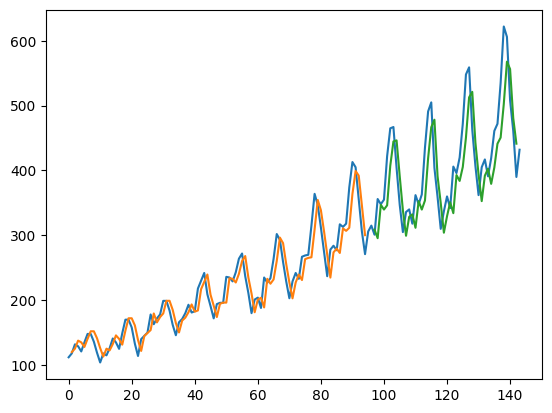

In [8]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()